In [16]:
import numpy as np

In [11]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
import sympy as sym

In [7]:
from sympy import *

In [5]:
x, y, z = sym.symbols("x y z")
k, m, n = sym.symbols("k m n", integer=True)
f, g, h = map(sym.Function, 'fgh')

In [12]:
(1/cos(x)).series(x, 0, 6)

     2      4        
    x    5⋅x     ⎛ 6⎞
1 + ── + ──── + O⎝x ⎠
    2     24         

In [37]:
(exp(x)).series(x, 0, 6)

         2    3    4     5        
        x    x    x     x     ⎛ 6⎞
1 + x + ── + ── + ── + ─── + O⎝x ⎠
        2    6    24   120        

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [22]:
def plot_taylor_approximations(func, x0=None, orders=(2, 4), xrange=(0,1), yrange=None, npts=200):
    """Plot the Taylor series approximations to a function at various orders.

    Parameters
    ----------
    func : a sympy function
    x0 : float
      Origin of the Taylor series expansion.  If not given, x0=xrange[0].
    orders : list
      List of integers with the orders of Taylor series to show.  Default is (2, 4).
    xrange : 2-tuple or array.
      Either an (xmin, xmax) tuple indicating the x range for the plot (default is (0, 1)),
      or the actual array of values to use.
    yrange : 2-tuple
      (ymin, ymax) tuple indicating the y range for the plot.  If not given,
      the full range of values will be automatically used. 
    npts : int
      Number of points to sample the x range with.  Default is 200.
      
    Examples
    --------
    
    >>> plot_taylor_approximations(sin, 0, [2, 4, 6], (0, 2*pi), (-2,2))
    """
    if not callable(func):
        raise ValueError('func must be callable')
    if isinstance(xrange, (list, tuple)):
        x = np.linspace(float(xrange[0]), float(xrange[1]), npts)
    else:
        x = xrange
    if x0 is None: x0 = x[0]
    xs = sym.Symbol('x')
    fx = func(xs)
    f = sym.lambdify(xs, fx, modules=['numpy'])
    fig = plt.figure(figsize=(14, 6))
    plt.plot(x, f(x), label=str(fx), lw=2)
    apps = {}
    for order in orders:
        app = fx.series(xs, x0, n=order).removeO()
        apps[order] = app
        if isinstance(app, sym.numbers.Number):
            y = np.zeros_like(x)
            y.fill(app.evalf())
        else:
            fa = sym.lambdify(xs, app, modules=['numpy'])
            y = fa(x)
        tex = sym.latex(app).replace('$', '')
        plt.plot(x, y, label=r'$n=%s:\, %s$' % (order, tex) )
        
    # Plot refinements
    if yrange is not None:
        plt.ylim(*yrange)
    plt.grid()
    plt.legend(loc='best').get_frame().set_alpha(0.8)

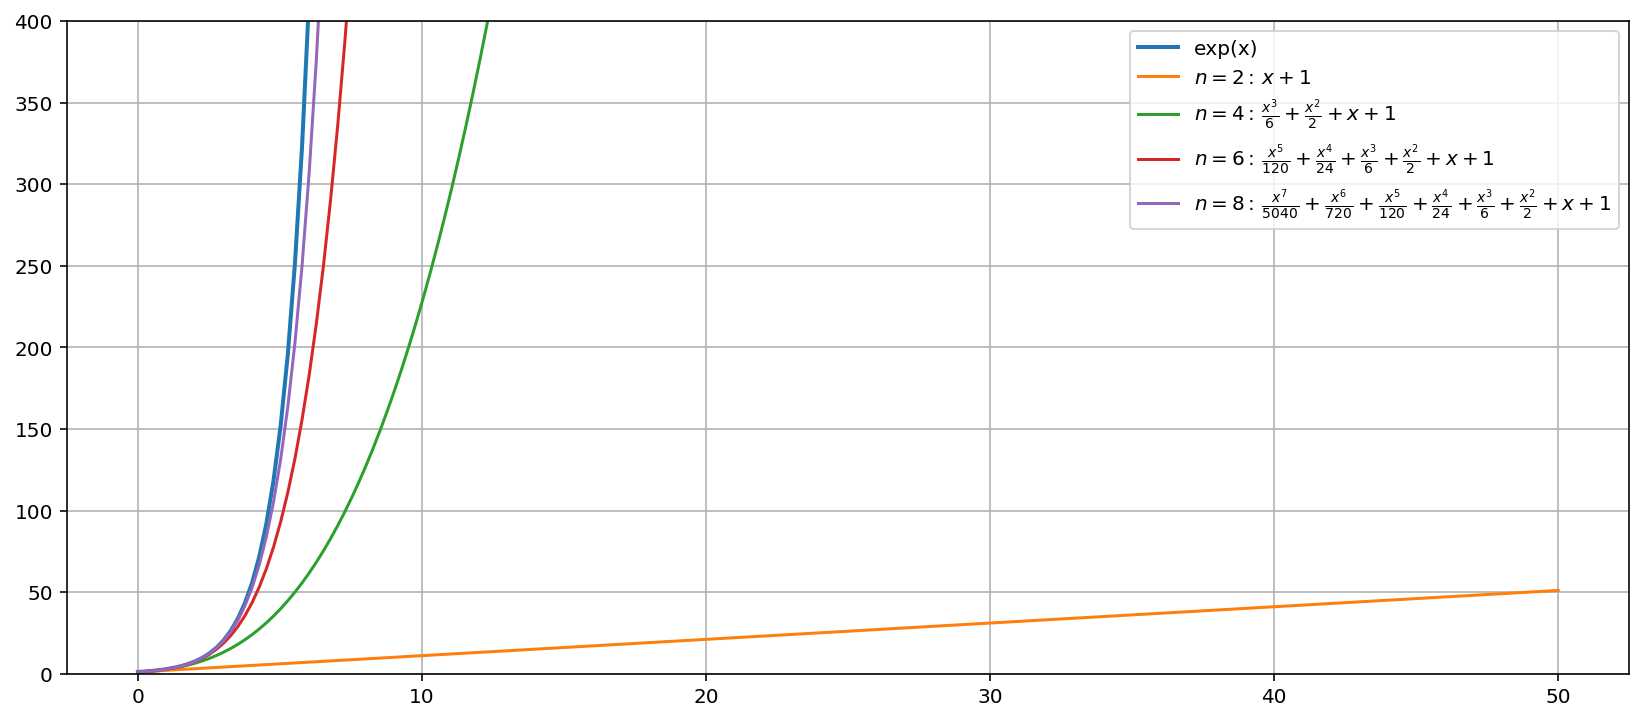

In [36]:
plot_taylor_approximations(exp, 0, [2 ,4, 6, 8], (0, 50), (0,400))